#### Carregando a base de dados

In [1]:
import pickle

with open(r'../_Material/Bases de dados/Bases pre-processadas/Base_credit_data.pkl', mode = 'rb') as arquivo:
    p_treinamento, c_treinamento, p_teste, c_teste = pickle.load( arquivo )

In [2]:
p_treinamento.shape, c_treinamento.shape

((1500, 3), (1500,))

In [3]:
p_teste.shape, c_teste.shape

((500, 3), (500,))

#### Aplicação do aprendizado

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p = 2)
knn.fit(p_treinamento, c_treinamento)

KNeighborsClassifier()

In [5]:
previsoes = knn.predict(p_teste)

from sklearn.metrics import accuracy_score

print(f'Precisão do modelo: {accuracy_score(c_teste, previsoes)*100:.2f}%')

Precisão do modelo: 98.60%


#### Visualizando resultados do modelo

In [6]:
from yellowbrick.classifier import ConfusionMatrix
from matplotlib.pyplot import xlabel, ylabel
from sklearn.metrics import classification_report

#### Explicação do resultado

Nesta matriz, os valores são provenientes do cruzamento entre as previsões e os valores reais do conjunto de dados. Sendo assim, pode-se chegar à seguinte conclusão:


**Para a classe "0", 432 previsões estão corretas e 4 estão incorretas.**

<br>

**Para a classe "1", 61 previsões estão corretas e 3 estão incorretas.**

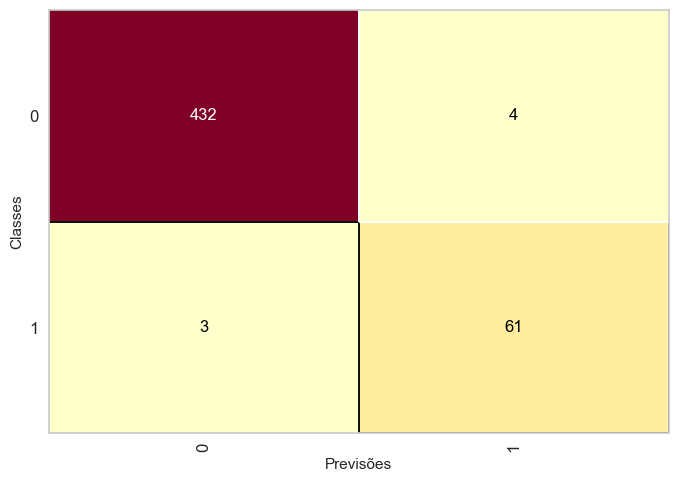

In [7]:
cm = ConfusionMatrix( knn )
cm.fit( p_treinamento, c_treinamento )
cm.score( p_teste, c_teste )

xlabel('Previsões');
ylabel('Classes');

#### Gerando relatório de classificação

In [8]:
print(classification_report(c_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500

